In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# caminhos para os csvs
ocorrencia_path = './dados/ocorrencia.csv'    
aeronave_path = './dados/aeronave.csv'    

# datesets completos
ocorrencia = pd.read_csv(ocorrencia_path, encoding="latin1", sep=";")
aeronave = pd.read_csv(aeronave_path, encoding="latin1", sep=";")

ocorrencia.head(5)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


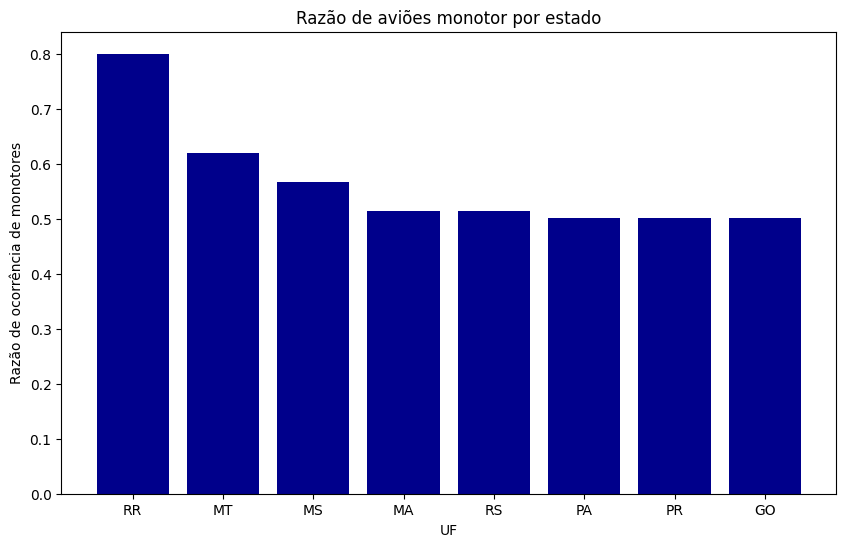

In [35]:
ocorrencia_aeronave = ocorrencia.merge(
    aeronave, 
    left_on="codigo_ocorrencia2", 
    right_on="codigo_ocorrencia2", 
    how="inner"
)[['codigo_ocorrencia', 'ocorrencia_uf', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo',
   'aeronave_motor_tipo', 'aeronave_motor_quantidade']]
grouped_data = ocorrencia_aeronave.groupby('aeronave_motor_quantidade')['codigo_ocorrencia'].count().reset_index()

ocorrencia_uf = [
            "RO", "AC", "AM", "RR", "PA", "AP", "TO",
            "MA", "PI", "CE", "RN", "PB",
            "PE", "AL", "SE", "BA",
            "MG", "ES", "RJ", "SP",
            "PR", "SC", "RS",
            "MS", "MT", "GO", "DF"
        ]

ratio_mono_to_bimotor = []
# grouped_data
# grouped_data[grouped_data['aeronave_motor_quantidade'] == 'MONOMOTOR']['codigo_ocorrencia']
for state in ocorrencia_uf:
    state_data = ocorrencia_aeronave[ocorrencia_aeronave['ocorrencia_uf'] == state].groupby('aeronave_motor_quantidade')['codigo_ocorrencia'].count().reset_index()
    ratio_mono_to_bimotor.append(state_data[state_data['aeronave_motor_quantidade'] == 'MONOMOTOR']['codigo_ocorrencia'].iloc[0] / state_data['codigo_ocorrencia'].sum())

new_data = {
    "ocorrencia_uf": ocorrencia_uf,
    "mono_to_bim_ratio": ratio_mono_to_bimotor
}
new_df = pd.DataFrame(new_data)
barplot_data = new_df.sort_values(by="mono_to_bim_ratio", ascending=False).head(8)

# Criar o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(barplot_data['ocorrencia_uf'], barplot_data['mono_to_bim_ratio'], color='darkblue')

# Adicionar título e rótulos
plt.title("Razão de aviões monotor por estado")
plt.ylabel("Razão de ocorrência de monotores")
plt.xlabel("UF")

# Mostrar o gráfico
plt.show()